In [1]:
from model import DDQN
from atari_wrappers import PongWrapper

import torch
import numpy as np

In [2]:
image_size = 42
stack_size = 4      # number of consecutive frames stacked

device = torch.device('cpu')

env = PongWrapper({'env_name': "PongDeterministic-v4",'image_size':image_size, 'stack_size':stack_size})

dqn = DDQN((stack_size, image_size, image_size), env.action_space.n, np.array([[32,4,2,0], [64,4,2,0], [64,3,1,0]]), [512]).to(device)

version = "500k"
modelname = "models/ddqn/frame" + version + ".pt"

sd = torch.load(modelname)
dqn.online.load_state_dict(sd)

<All keys matched successfully>

Return: 21.0


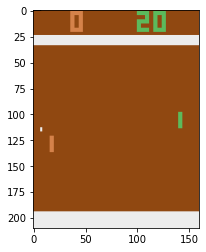

In [3]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline
import imageio

done = False
state = env.reset()

img = plt.imshow(env.render(mode='rgb_array')) # only call this once
r = 0
dqn.eval()
while not done:
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    with torch.no_grad():
        q_values = dqn(torch.as_tensor(state, dtype=torch.float32, device=device).unsqueeze(0), version="online")
        action = q_values.argmax().item()
    
    state, reward, done, _ = env.step(action)
    r += reward
        
print(f"Return: {r}")